In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
weather = pd.read_csv('../Final_Data/London_weather_data_2011_2014.csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH'],
      dtype='object')

In [3]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [4]:
weather.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2011-11-01 01:00:00          0  2011-11-01 01:00:00         51.8      88.0   
2011-11-01 02:00:00          1  2011-11-01 02:00:00         53.6      94.0   
2011-11-01 03:00:00          2  2011-11-01 03:00:00         53.6      88.0   
2011-11-01 04:00:00          3  2011-11-01 04:00:00         53.6      88.0   
2011-11-01 05:00:00          4  2011-11-01 05:00:00         53.6      88.0   

                     Temperature_F  Wind_Speed_MPH  
2011-11-01 01:00:00           55.4             6.9  
2011-11-01 02:00:00           55.4             8.1  
2011-11-01 03:00:00           57.2             9.2  
2011-11-01 04:00:00           57.2             9.2  
2011-11-01 05:00:00           57.2             8.1

In [5]:
# slicing out 2013 data
weather2013 = weather[weather.index.year == 2013]
weather2012 = weather[weather.index.year == 2012]
weather1213 = pd.concat([weather2012, weather2013])

In [6]:
weather1213.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2012-01-01 00:00:00       1460  2012-01-01 00:00:00         50.0      88.0   
2012-01-01 01:00:00       1461  2012-01-01 01:00:00         50.0      88.0   
2012-01-01 02:00:00       1462  2012-01-01 02:00:00         51.8      94.0   
2012-01-01 03:00:00       1463  2012-01-01 03:00:00         51.0      92.0   
2012-01-01 04:00:00       1464  2012-01-01 04:00:00         50.0      88.0   

                     Temperature_F  Wind_Speed_MPH  
2012-01-01 00:00:00           53.6            13.8  
2012-01-01 01:00:00           53.6            15.0  
2012-01-01 02:00:00           53.6            13.8  
2012-01-01 03:00:00           53.0            13.8  
2012-01-01 04:00:00           53.6            10.4

In [7]:
energy2013 = pd.read_csv('../Final_Data/energy_final_2013.csv', parse_dates=[0], infer_datetime_format=True)
energy2013.iloc[:,1:].convert_objects(convert_numeric=True)
energy2013.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [8]:
energy2012 = pd.read_csv('../Final_Data/energy_final_2012.csv', parse_dates=[0], infer_datetime_format=True)
energy2012.iloc[:,1:].convert_objects(convert_numeric=True)
energy2012.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [9]:
energy1213 = pd.concat([energy2012, energy2013])
energy1213.head()

Unnamed: 0             DateTime  Adversity  Affluent  Comfortable   Overall
0          0  2012-01-01 00:00:00   0.221192  0.268072     0.190114  0.231749
1          1  2012-01-01 01:00:00   0.616456  0.633311     0.355447  0.550101
2          2  2012-01-01 02:00:00   0.483976  0.570036     0.296605  0.466764
3          3  2012-01-01 03:00:00   0.375616  0.489018     0.236228  0.383123
4          4  2012-01-01 04:00:00   0.324936  0.376808     0.206053  0.312892

In [10]:
energy1213.index = pd.DatetimeIndex(energy1213.DateTime)

In [11]:
energy1213.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
energy1213.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income', 'Overall']]

In [13]:
energy1213.head()

Datetime  Low_Income  High_Income  \
2012-01-01 00:00:00  2012-01-01 00:00:00    0.221192     0.268072   
2012-01-01 01:00:00  2012-01-01 01:00:00    0.616456     0.633311   
2012-01-01 02:00:00  2012-01-01 02:00:00    0.483976     0.570036   
2012-01-01 03:00:00  2012-01-01 03:00:00    0.375616     0.489018   
2012-01-01 04:00:00  2012-01-01 04:00:00    0.324936     0.376808   

                     Middle_Income   Overall  
2012-01-01 00:00:00       0.190114  0.231749  
2012-01-01 01:00:00       0.355447  0.550101  
2012-01-01 02:00:00       0.296605  0.466764  
2012-01-01 03:00:00       0.236228  0.383123  
2012-01-01 04:00:00       0.206053  0.312892

In [14]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy1213.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [15]:
final1213 = pd.merge(weather1213, energy1213, on='Datetime')

In [16]:
final1213.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  Temperature_F  \
0       1460  2012-01-01 00:00:00         50.0      88.0           53.6   
1       1461  2012-01-01 01:00:00         50.0      88.0           53.6   
2       1462  2012-01-01 02:00:00         51.8      94.0           53.6   
3       1463  2012-01-01 03:00:00         51.0      92.0           53.0   
4       1464  2012-01-01 04:00:00         50.0      88.0           53.6   

   Wind_Speed_MPH  Low_Income  High_Income  Middle_Income   Overall  
0            13.8    0.221192     0.268072       0.190114  0.231749  
1            15.0    0.616456     0.633311       0.355447  0.550101  
2            13.8    0.483976     0.570036       0.296605  0.466764  
3            13.8    0.375616     0.489018       0.236228  0.383123  
4            10.4    0.324936     0.376808       0.206053  0.312892

In [17]:
data2 = final1213.groupby(['Temperature_F']).mean()
data2.reset_index(inplace=True)
data2.describe()

Temperature_F  Dew_Point_F   Humidity  Wind_Speed_MPH  Low_Income  \
count      99.000000    99.000000  99.000000       99.000000   99.000000   
mean       56.165657    43.691139  63.500375        8.574301    0.355526   
std        20.055699    12.141856  19.974889        2.175110    0.045617   
min        19.400000    15.800000  12.000000        1.200000    0.241555   
25%        39.100000    34.082063  45.147530        7.756190    0.323271   
50%        56.000000    48.365854  70.045455        9.165369    0.337778   
75%        73.200000    53.422563  79.461942        9.934031    0.395830   
max        91.400000    64.000000  95.000000       14.300000    0.496304   

       High_Income  Middle_Income    Overall  
count    99.000000      99.000000  99.000000  
mean      0.461066       0.403562   0.412868  
std       0.086596       0.054952   0.065086  
min       0.338639       0.273886   0.301046  
25%       0.393549       0.365832   0.364478  
50%       0.420763       0.381449   0.378946  
75%       0.541764       0.447996   0.474685  
max       0.645707       0.529608   0.566095

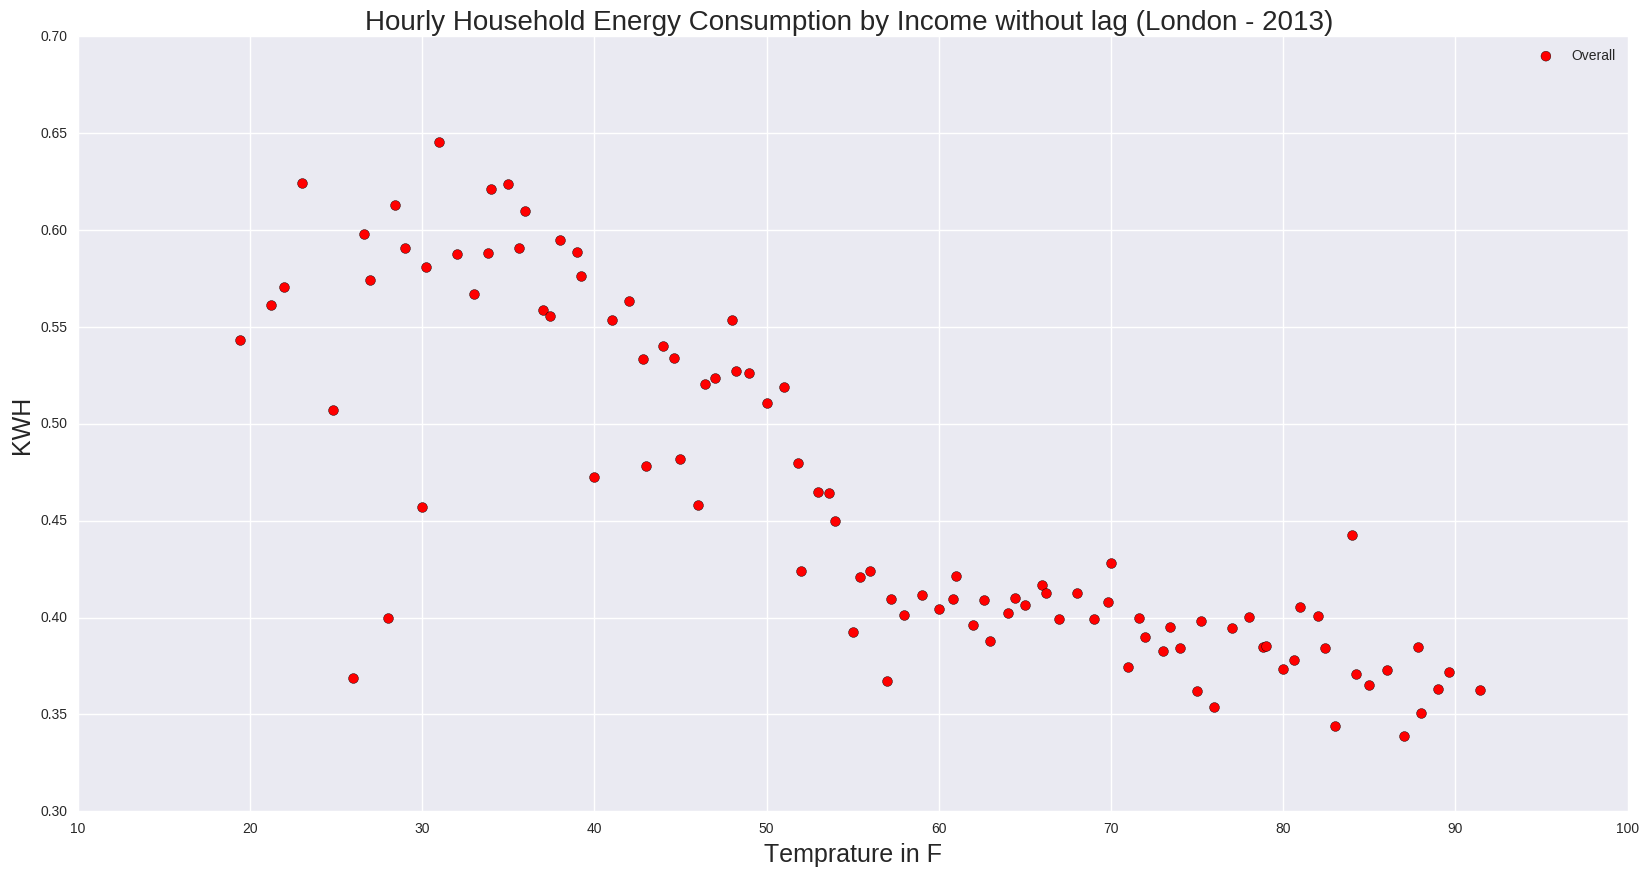

In [18]:
ax1 = pl.figure(figsize=(20,10)).add_subplot(111)

data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1, label='Overall')
pl.title('Hourly Household Energy Consumption by Income without lag (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()


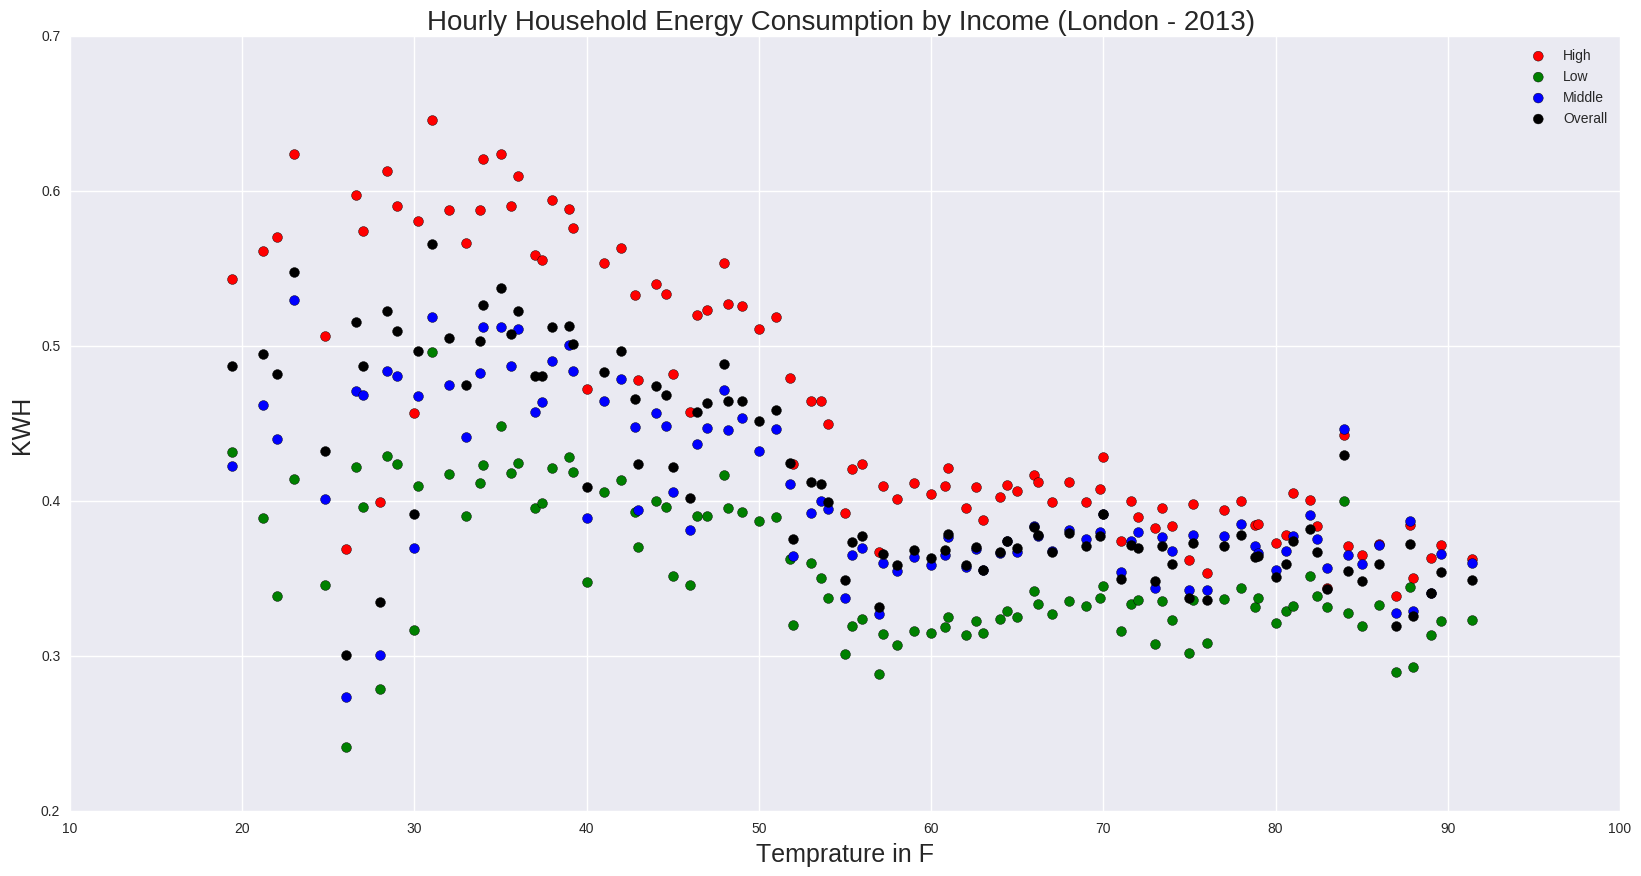

In [19]:
ax1 = pl.figure(figsize=(20,10)).add_subplot(111)

data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1, label='High')
data2.plot(kind='scatter', x='Temperature_F', y='Low_Income', color='g',s=50, alpha=1, ax=ax1, label='Low')
data2.plot(kind='scatter', x='Temperature_F', y='Middle_Income', color='b',s=50, alpha=1, ax=ax1, label='Middle')
data2.plot(kind='scatter', x='Temperature_F', y='Overall', color='k',s=50, alpha=1, ax=ax1, label='Overall')

pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
pl.legend()

In [20]:
#defining a dataframe to store r-squared values
lag = np.linspace(0,24,25)
rsqd = pd.DataFrame(lag, columns=['lag'])
rsqd['1deg'] = np.zeros(25)
rsqd['1deg_adj'] = np.zeros(25)
rsqd['2deg'] = np.zeros(25)
rsqd['2deg_adj'] = np.zeros(25)
rsqd['3deg'] = np.zeros(25)
rsqd['3deg_adj'] = np.zeros(25)
rsqd['LR12'] = np.zeros(25)
rsqd['LR23'] = np.zeros(25)
rsqd.head()

lag  1deg  1deg_adj  2deg  2deg_adj  3deg  3deg_adj  LR12  LR23
0  0.0   0.0       0.0   0.0       0.0   0.0       0.0   0.0   0.0
1  1.0   0.0       0.0   0.0       0.0   0.0       0.0   0.0   0.0
2  2.0   0.0       0.0   0.0       0.0   0.0       0.0   0.0   0.0
3  3.0   0.0       0.0   0.0       0.0   0.0       0.0   0.0   0.0
4  4.0   0.0       0.0   0.0       0.0   0.0       0.0   0.0   0.0

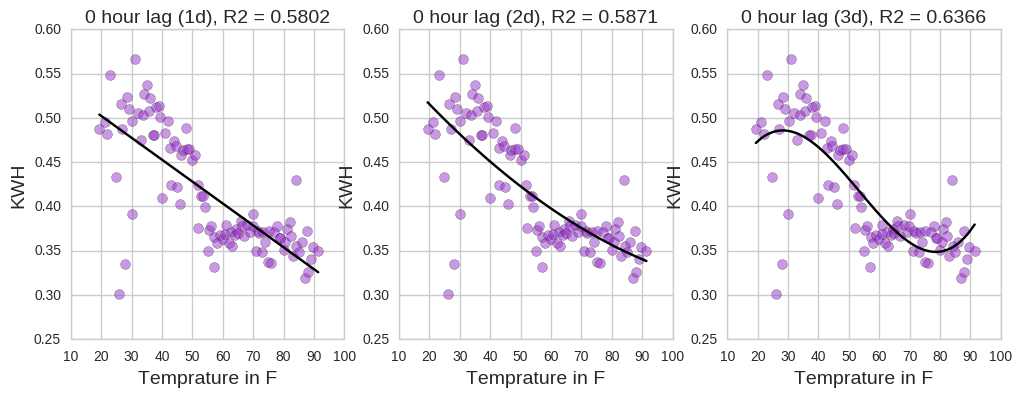

In [21]:
#running regression for no lag
p1 = smf.ols(formula = 'Overall ~ Temperature_F', data = data2).fit()
p2 = smf.ols(formula = 'Overall ~ np.power(Temperature_F, 2) + Temperature_F', data = data2).fit()
p3 = smf.ols(formula = 'Overall ~ np.power(Temperature_F, 3) + np.power(Temperature_F, 2) + Temperature_F', data = data2).fit()
#saving r-squared values
rsqd['1deg'][0] = p1.rsquared
rsqd['2deg'][0] = p2.rsquared
rsqd['3deg'][0] = p3.rsquared
rsqd['1deg_adj'][0] = p1.rsquared_adj
rsqd['2deg_adj'][0] = p2.rsquared_adj
rsqd['3deg_adj'][0] = p3.rsquared_adj
rsqd['LR12'] = str(p2.compare_lr_test(p1))
rsqd['LR23'] = str(p3.compare_lr_test(p2))

#ploting results
sns.set_style("whitegrid")
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
data2.plot(kind='scatter', x='Temperature_F', y='Overall', color='darkorchid',s=50, alpha=.5, ax=ax1)
ax1.plot(data2.Temperature_F, p1.predict(), color='k')
ax1.set_title('{0} hour lag (1d), R2 = {1}'.format( 0, round(p1.rsquared, 4)), fontsize=14)
ax1.set_ylabel("KWH", fontsize=14)
ax1.set_xlabel("Temprature in F", fontsize=14)
data2.plot(kind='scatter', x='Temperature_F', y='Overall', color='darkorchid',s=50, alpha=.5, ax=ax2)
ax2.plot(data2.Temperature_F, p2.predict(), color='k')
ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(0, round(p2.rsquared, 4)), fontsize=14)
ax2.set_ylabel("KWH", fontsize=14)
ax2.set_xlabel("Temprature in F", fontsize=14)
data2.plot(kind='scatter', x='Temperature_F', y='Overall', color='darkorchid',s=50, alpha=.5, ax=ax3)
ax3.plot(data2.Temperature_F, p3.predict(), color='k')
ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(0, round(p3.rsquared, 4)), fontsize=14)
ax3.set_ylabel("KWH", fontsize=14)
ax3.set_xlabel("Temprature in F", fontsize=14)

# lag analysis


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packa

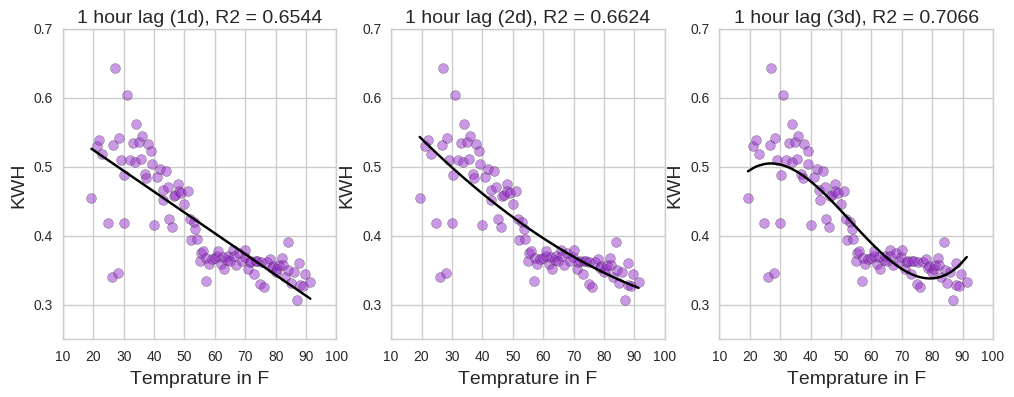

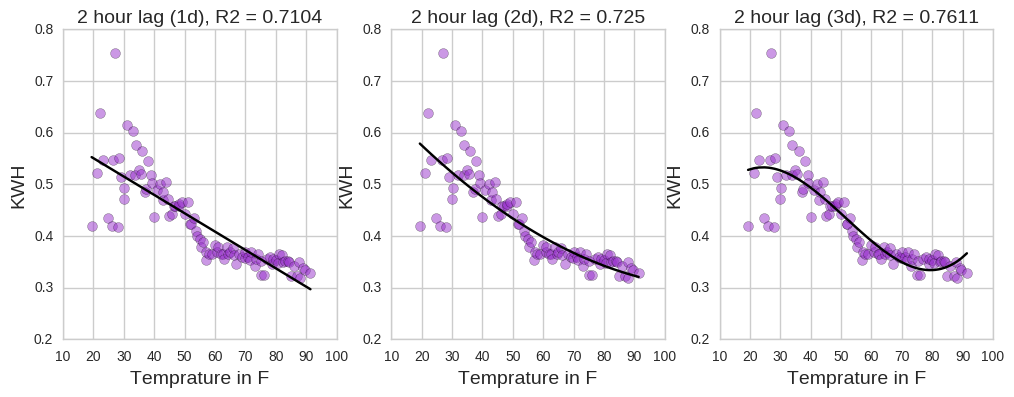

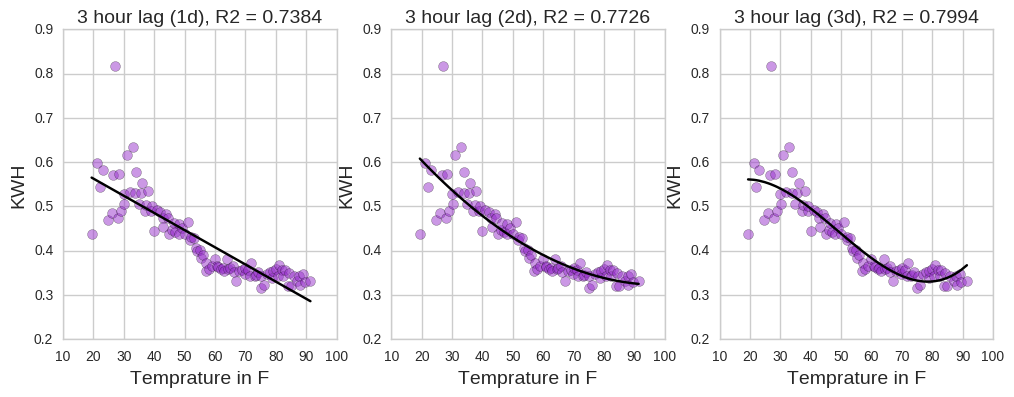

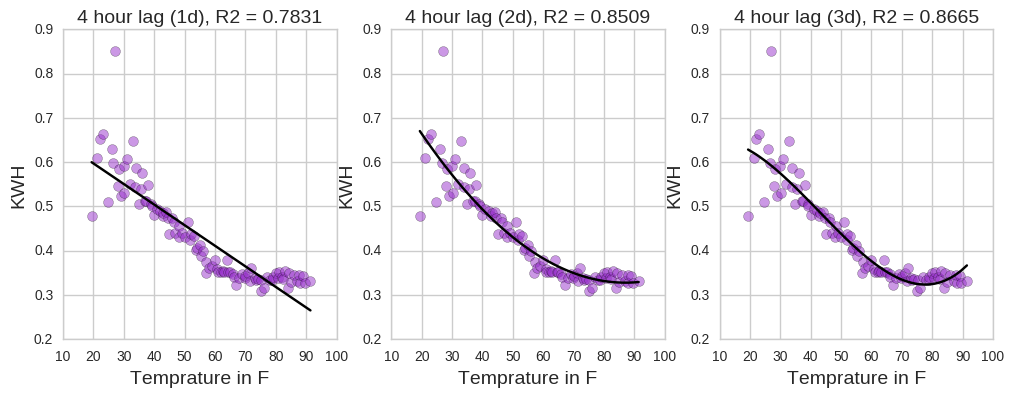

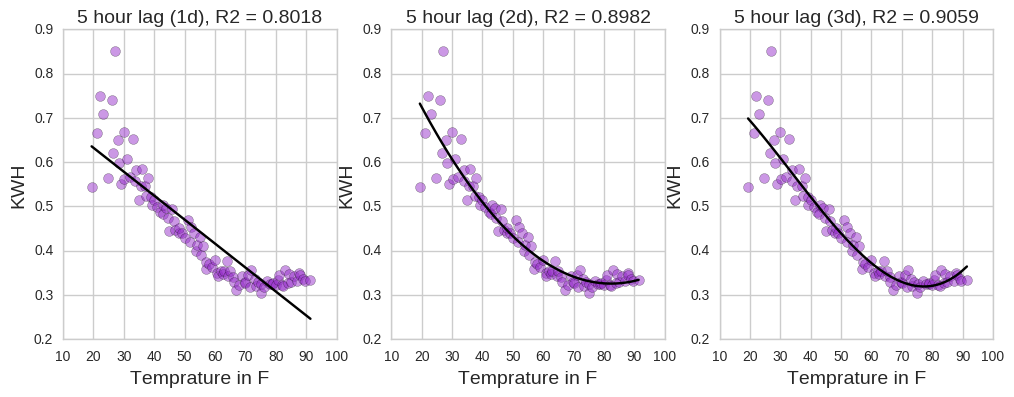

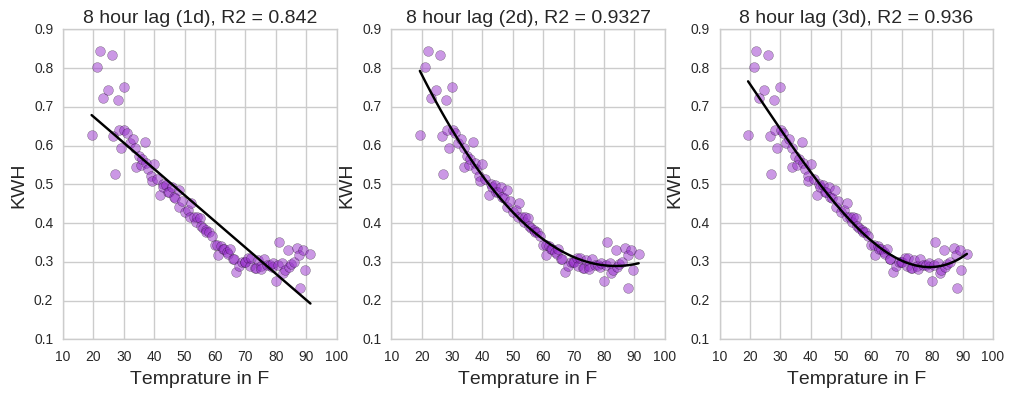

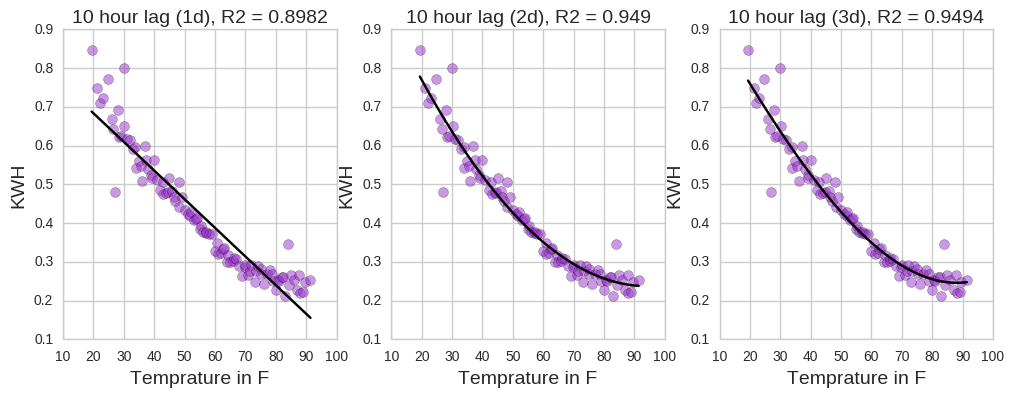

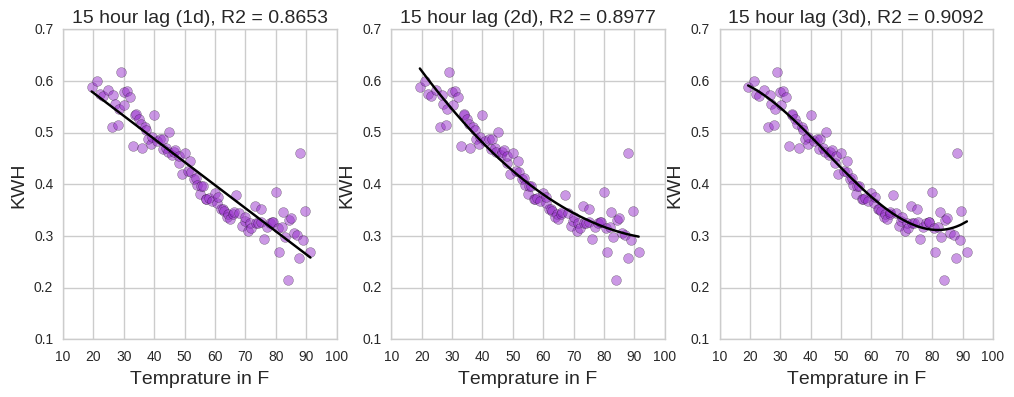

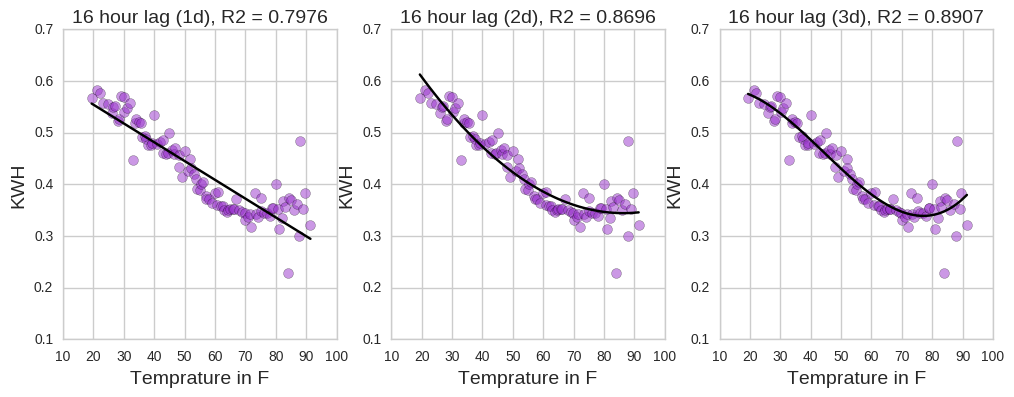

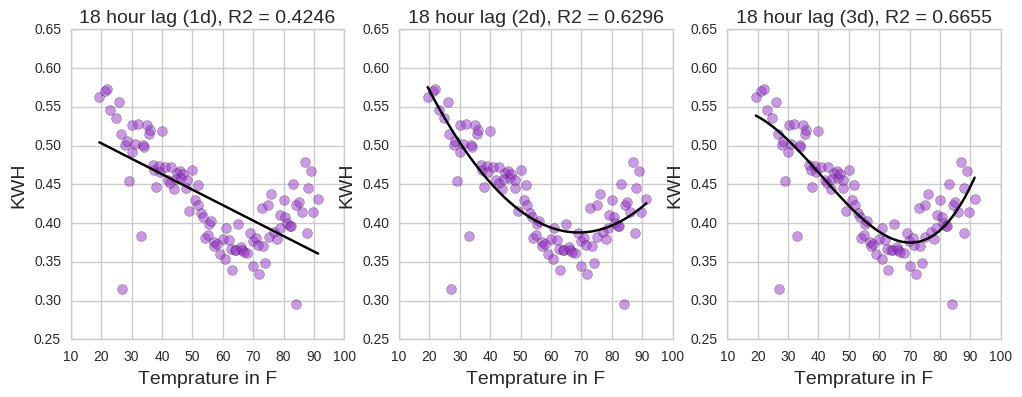

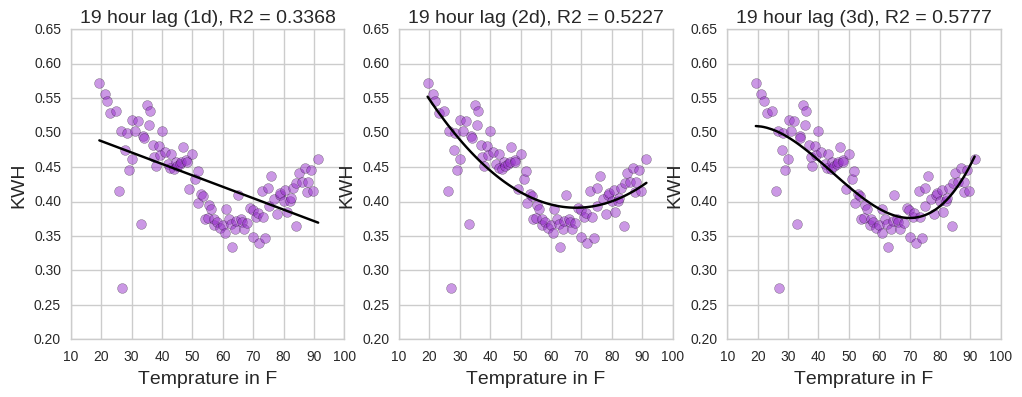

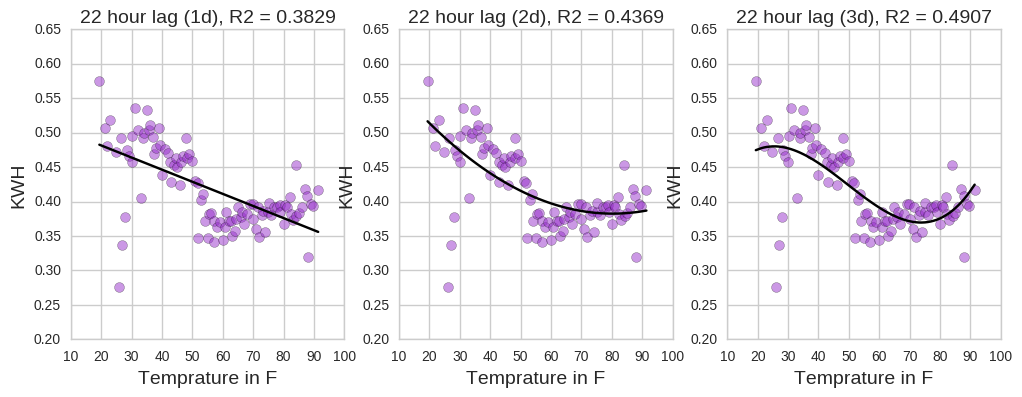

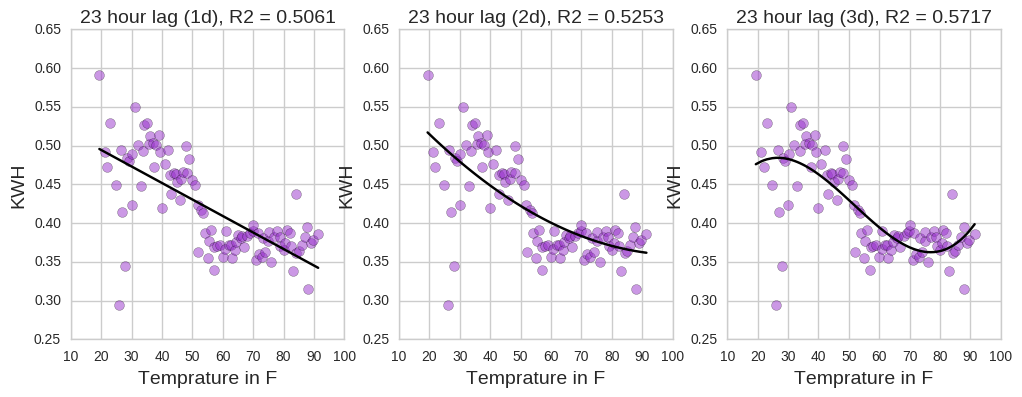

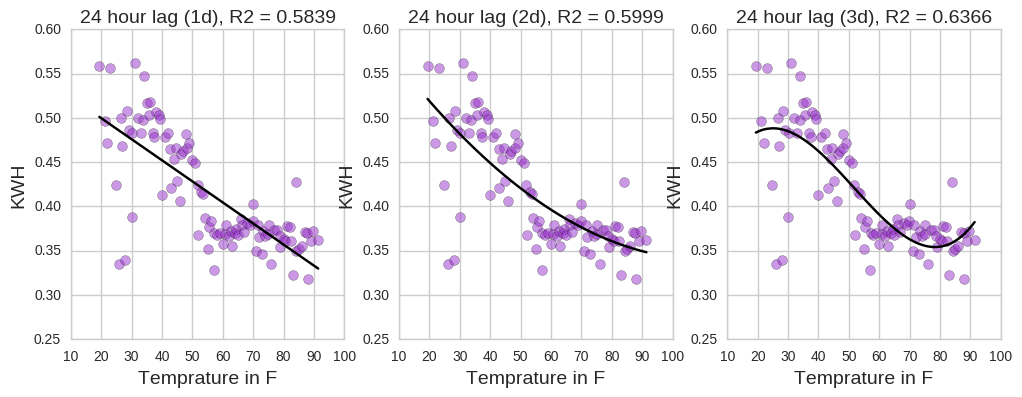

In [22]:
for i in range(1,25):
    #establishing the lag
    x = np.array(final1213.Temperature_F[i:])
    y1 = np.array(final1213.Overall[:-i])
    timelag = pd.DataFrame()
    timelag['Temp'] = x
    timelag['Overall'] = y1
    #grouping by temperature
    lag_grp = timelag.groupby(['Temp']).mean()
    lag_grp.reset_index(inplace=True)
    #running regression
    p1 = smf.ols(formula = 'Overall ~ Temp', data = lag_grp).fit()
    p2 = smf.ols(formula = 'Overall ~ np.power(Temp, 2) + Temp', data = lag_grp).fit()
    p3 = smf.ols(formula = 'Overall ~ np.power(Temp, 3) + np.power(Temp, 2) + Temp', data = lag_grp).fit()
    #saving r-squared values
    rsqd['1deg'][i] = p1.rsquared
    rsqd['2deg'][i] = p2.rsquared
    rsqd['3deg'][i] = p3.rsquared
    rsqd['1deg_adj'][i] = p1.rsquared_adj
    rsqd['2deg_adj'][i] = p2.rsquared_adj
    rsqd['3deg_adj'][i] = p3.rsquared_adj
    rsqd['LR12'][i] = str(p2.compare_lr_test(p1))
    rsqd['LR23'][i] = str(p3.compare_lr_test(p2))
    #ploting results
    sns.set_style("whitegrid")
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='darkorchid',s=50, alpha=.5, ax=ax1)
    ax1.plot(lag_grp.Temp, p1.predict(), color='k')
    ax1.set_title('{0} hour lag (1d), R2 = {1}'.format(i, round(p1.rsquared, 4)), fontsize=14)
    ax1.set_ylabel("KWH", fontsize=14)
    ax1.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='darkorchid',s=50, alpha=.5, ax=ax2)
    ax2.plot(lag_grp.Temp, p2.predict(), color='k')
    ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(i, round(p2.rsquared, 4)), fontsize=14)
    ax2.set_ylabel("KWH", fontsize=14)
    ax2.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='darkorchid',s=50, alpha=.5, ax=ax3)
    ax3.plot(lag_grp.Temp, p3.predict(), color='k')
    ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(i, round(p3.rsquared, 4)), fontsize=14)
    ax3.set_ylabel("KWH", fontsize=14)
    ax3.set_xlabel("Temprature in F", fontsize=14)

In [23]:
rsqd

lag      1deg  1deg_adj      2deg  2deg_adj      3deg  3deg_adj  \
0    0.0  0.580238  0.575910  0.587142  0.578541  0.636637  0.625162   
1    1.0  0.654406  0.650843  0.662410  0.655377  0.706562  0.697296   
2    2.0  0.710387  0.707402  0.724973  0.719243  0.761106  0.753562   
3    3.0  0.738432  0.735735  0.772616  0.767879  0.799411  0.793077   
4    4.0  0.783146  0.780910  0.850852  0.847745  0.866492  0.862276   
5    5.0  0.801815  0.799772  0.898250  0.896130  0.905889  0.902917   
6    6.0  0.817574  0.815693  0.943889  0.942720  0.946699  0.945015   
7    7.0  0.832680  0.830955  0.950406  0.949373  0.953384  0.951912   
8    8.0  0.842033  0.840404  0.932724  0.931323  0.936039  0.934019   
9    9.0  0.874616  0.873323  0.946638  0.945527  0.947668  0.946015   
10  10.0  0.898225  0.897175  0.948981  0.947918  0.949440  0.947843   
11  11.0  0.904343  0.903356  0.936193  0.934864  0.936234  0.934220   
12  12.0  0.906779  0.905818  0.933871  0.932494  0.933879  0.931791   
13  13.0  0.916540  0.915680  0.936971  0.935658  0.937139  0.935153   
14  14.0  0.913545  0.912654  0.928367  0.926874  0.930916  0.928734   
15  15.0  0.865270  0.863881  0.897673  0.895541  0.909248  0.906383   
16  16.0  0.797585  0.795498  0.869627  0.866910  0.890740  0.887290   
17  17.0  0.626268  0.622415  0.764207  0.759295  0.795619  0.789165   
18  18.0  0.424564  0.418632  0.629639  0.621923  0.665516  0.654953   
19  19.0  0.336754  0.329917  0.522725  0.512782  0.577656  0.564319   
20  20.0  0.274169  0.266686  0.405511  0.393125  0.465141  0.448251   
21  21.0  0.263254  0.255659  0.366612  0.353416  0.417139  0.398733   
22  22.0  0.382901  0.376539  0.436893  0.425162  0.490715  0.474633   
23  23.0  0.506060  0.500968  0.525289  0.515399  0.571736  0.558211   
24  24.0  0.583893  0.579604  0.599869  0.591533  0.636591  0.625115   

                                                 LR12  \
0      (1.6419127289093467, 0.20006323601478937, 1.0)   
1      (2.3199431973381479, 0.12772469016704058, 1.0)   
2     (5.1157140224722752, 0.023710107443989895, 1.0)   
3   (13.865601989478591, 0.00019635969083655718, 1.0)   
4   (37.054491716858024, 1.1487365604507486e-09, 1.0)   
5   (66.001165734000779, 4.5065636110157609e-16, 1.0)   
6   (116.72245548033015, 3.3018661179664166e-27, 1.0)   
7   (120.38896204232435, 5.1997248373974613e-28, 1.0)   
8   (84.505148770530923, 3.8321557415889479e-20, 1.0)   
9   (84.574527301530566, 3.7000157790453359e-20, 1.0)   
10  (68.365668137295643, 1.3582176877647258e-16, 1.0)   
11  (40.085988185494557, 2.4302593796163165e-10, 1.0)   
12  (33.993332908183106, 5.5301239890018177e-09, 1.0)   
13  (27.795854468254674, 1.3481467497478549e-07, 1.0)   
14  (18.618292394468199, 1.5968099782513222e-05, 1.0)   
15  (27.235062480280931, 1.8016164745709417e-07, 1.0)   
16  (43.551697056912872, 4.1290596482437714e-11, 1.0)   
17  (45.597880909835567, 1.4519857989332625e-11, 1.0)   
18  (43.624225399145644, 3.9788305895532721e-11, 1.0)   
19  (32.576251542060959, 1.1460661361537298e-08, 1.0)   
20  (19.761839104578939, 8.7716642664563492e-06, 1.0)   
21   (14.96475115220619, 0.00010953834396607342, 1.0)   
22   (9.0645135538293289, 0.0026061785834985019, 1.0)   
23    (3.9309324449855012, 0.047405652455070918, 1.0)   
24    (3.8758847757457033, 0.048984484798905506, 1.0)   

                                                 LR23  
0   (12.642268049999529, 0.00037712217135036329, 1.0)  
1   (13.876573274010866, 0.00019521669536508776, 1.0)  
2   (13.944147409792208, 0.00018832304973983511, 1.0)  
3    (12.412812020239357, 0.0004263983039906357, 1.0)  
4   (10.966846438787684, 0.00092756476579341357, 1.0)  
5    (7.7263568773130373, 0.0054420445829476876, 1.0)  
6      (5.085493938616537, 0.024126803197341441, 1.0)  
7     (6.1290098925604752, 0.013298132283471665, 1.0)  
8     (5.0015937266822448, 0.025323989733566549, 1.0)  
9       (1.9290894458085859, 0.1648580985272905, 1.0)  
10    (0.89476280796122865, 0.344

# 7 hour lag and 3rd degree polyfit has the best R-squared (0.953384), R-squared_adj (0.951912), LR (6.1290098925604752, 0.013298132283471665, 1.0)

# Suck it Victors :P

In [24]:
data2 = final1213.groupby(['Temperature_F']).mean()
data2.reset_index(inplace=True)
data3 = final1213.groupby(['Temperature_F']).std()
data3.reset_index(inplace=True)
data4 = pd.merge(data2, data3, on='Temperature_F')
data4

Temperature_F  Dew_Point_F_x  Humidity_x  Wind_Speed_MPH_x  Low_Income_x  \
0            19.4      15.800000   86.000000          2.300000      0.432138   
1            21.2      18.050000   87.750000          3.487500      0.389513   
2            22.0      19.333333   83.666667          3.500000      0.338869   
3            23.0      19.125000   84.125000          3.471429      0.414354   
4            24.8      22.136000   90.000000          3.352632      0.346272   
5            26.0      23.000000   83.000000          5.800000      0.241555   
6            26.6      22.030769   83.461538          4.857143      0.422164   
7            27.0      26.000000   95.000000          1.200000      0.396299   
8            28.0      23.750000   79.000000          3.750000      0.278830   
9            28.4      24.250526   85.042105          6.067059      0.429532   
10           29.0      25.000000   79.777778          7.166667      0.423902   
11           30.0      27.000000   84.000000          6.000000      0.317258   
12           30.2      26.780000   87.618750          6.203947      0.409913   
13           31.0      26.000000   77.666667          5.783333      0.496304   
14           32.0      27.121705   82.476744          7.307377      0.417360   
15           33.0      25.444444   64.666667          7.188889      0.390685   
16           33.8      28.096250   80.743750          7.277302      0.412124   
17           34.0      27.363636   70.045455          8.490909      0.423312   
18           35.0      29.594595   75.054054          7.608108      0.448379   
19           35.6      30.317227   82.027311          7.367826      0.418470   
20           36.0      31.160000   76.800000          7.760000      0.424971   
21           37.0      31.608696   75.217391          9.926087      0.395992   
22           37.4      32.501527   83.190840          7.500781      0.398641   
23           38.0      34.461538   82.538462          6.530769      0.421205   
24           39.0      33.571429   75.333333          7.752381      0.428679   
25           39.2      33.859779   81.972325          7.822787      0.418798   
26           40.0      34.304348   75.000000          8.426087      0.348054   
27           41.0      35.185692   80.432432          7.988474      0.406002   
28           42.0      36.458333   75.458333          8.708333      0.413738   
29           42.8      37.526633   82.267588          8.308046      0.393059   
..            ...            ...         ...               ...           ...   
69           70.0      53.933333   47.600000          8.533333      0.345278   
70           71.0      53.454545   44.454545         10.381818      0.316303   
71           71.6      54.691943   56.142180          9.699524      0.333690   
72           72.0      52.916667   41.333333          8.075000      0.336141   
73           73.0      55.714286   45.285714          9.400000      0.307832   
74           73.4      54.690909   52.951515         10.180488      0.336017   
75           74.0      55.000000   42.142857          9.228571      0.323487   
76           75.0      53.750000   37.000000          8.950000      0.302328   
77           75.2      54.389474   48.964912          9.496491      0.336047   
78           76.0      55.125000   38.375000         11.237500      0.308753   
79           77.0      53.882243   45.009346          9.259813      0.336996   
80           78.0      54.375000   34.625000         10.087500      0.344030   
81           78.8      53.838554   43.240964          9.024096      0.331932   
82           79.0      51.875000   28.625000          8.225000      0.337538   
83           80.0      51.600000   27.200000          9.940000      0.321303   
84           80.6      52.772000   39.160000          9.574000      0.329364   
85           81.0      64.000000   47.333333         11.133333      0.332791   
86           82.0      61.000000   39.333333         10.766667      0.352018   
87  

In [25]:
data4.columns

Index([u'Temperature_F', u'Dew_Point_F_x', u'Humidity_x', u'Wind_Speed_MPH_x',
       u'Low_Income_x', u'High_Income_x', u'Middle_Income_x', u'Overall_x',
       u'Dew_Point_F_y', u'Humidity_y', u'Wind_Speed_MPH_y', u'Low_Income_y',
       u'High_Income_y', u'Middle_Income_y', u'Overall_y'],
      dtype='object')

In [26]:
data5 = data4[['Temperature_F', 'Overall_x', 'Overall_y']]
data5

Temperature_F  Overall_x  Overall_y
0            19.4   0.487586   0.003592
1            21.2   0.495268   0.079541
2            22.0   0.482308   0.060250
3            23.0   0.548037   0.120082
4            24.8   0.432747   0.127609
5            26.0   0.301046        NaN
6            26.6   0.515446   0.175873
7            27.0   0.487148        NaN
8            28.0   0.335303   0.068346
9            28.4   0.523082   0.194969
10           29.0   0.509591   0.144241
11           30.0   0.391636   0.075786
12           30.2   0.497009   0.195274
13           31.0   0.566095   0.213013
14           32.0   0.505058   0.185719
15           33.0   0.474958   0.200456
16           33.8   0.503169   0.181529
17           34.0   0.526672   0.168178
18           35.0   0.537612   0.176589
19           35.6   0.507782   0.179524
20           36.0   0.522888   0.199653
21           37.0   0.480723   0.186819
22           37.4   0.480671   0.172118
23           38.0   0.512599   0.181699
24           39.0   0.513382   0.182570
25           39.2   0.501487   0.177909
26           40.0   0.409378   0.153855
27           41.0   0.483418   0.172019
28           42.0   0.496692   0.173280
29           42.8   0.465854   0.170393
..            ...        ...        ...
69           70.0   0.391555   0.077036
70           71.0   0.350125   0.071667
71           71.6   0.371775   0.054101
72           72.0   0.369662   0.071484
73           73.0   0.348439   0.036284
74           73.4   0.371228   0.051834
75           74.0   0.359814   0.047991
76           75.0   0.337667   0.014619
77           75.2   0.372835   0.051072
78           76.0   0.336211   0.037388
79           77.0   0.371295   0.049739
80           78.0   0.377960   0.051368
81           78.8   0.364085   0.039615
82           79.0   0.364871   0.053863
83           80.0   0.351408   0.032429
84           80.6   0.359566   0.041985
85           81.0   0.374601   0.091541
86           82.0   0.382364   0.041688
87           82.4   0.367082   0.043010
88           83.0   0.343659        NaN
89           84.0   0.430171   0.004373
90           84.2   0.355351   0.037149
91           85.0   0.348691   0.032050
92           86.0   0.359527   0.035389
93           87.0   0.319647        NaN
94           87.8   0.372419   0.042664
95           88.0   0.325986        NaN
96           89.0   0.340791        NaN
97           89.6   0.354306   0.048711
98           91.4   0.349216   0.024456

[99 rows x 3 columns]

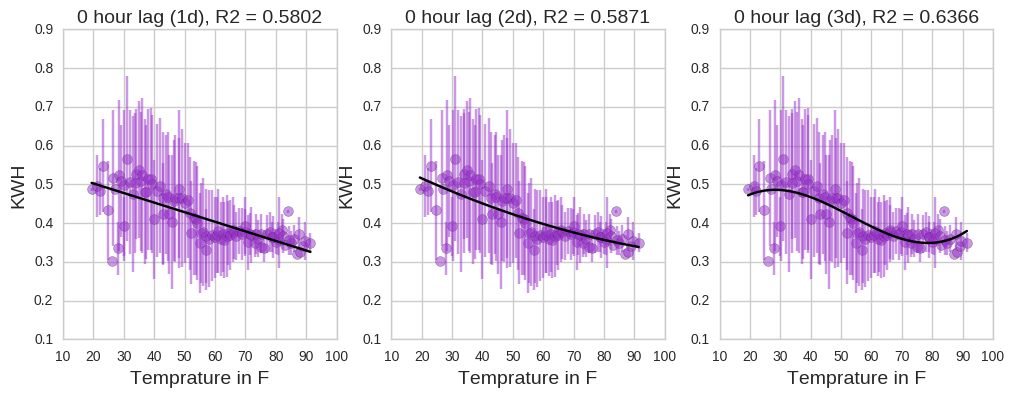

In [27]:
#running regression for no lag
p1 = smf.ols(formula = 'Overall_x ~ Temperature_F', data = data5).fit()
p2 = smf.ols(formula = 'Overall_x ~ np.power(Temperature_F, 2) + Temperature_F', data = data5).fit()
p3 = smf.ols(formula = 'Overall_x ~ np.power(Temperature_F, 3) + np.power(Temperature_F, 2) + Temperature_F', data = data5).fit()
#saving r-squared values
#    rsqd['1deg'][0] = p1.rsquared
#    rsqd['2deg'][0] = p2.rsquared
#    rsqd['3deg'][0] = p3.rsquared
#    rsqd['1deg_adj'][0] = p1.rsquared_adj
#    rsqd['2deg_adj'][0] = p2.rsquared_adj
#    rsqd['3deg_adj'][0] = p3.rsquared_adj
#    rsqd['LR12'] = str(p2.compare_lr_test(p1))
#    rsqd['LR23'] = str(p3.compare_lr_test(p2))

#ploting results
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
data5.plot(kind='scatter', x='Temperature_F', y='Overall_x', yerr='Overall_y', color='darkorchid', s=50, alpha=.5, ax=ax1)
ax1.plot(data2.Temperature_F, p1.predict(), color='k')
ax1.set_title('{0} hour lag (1d), R2 = {1}'.format( 0, round(p1.rsquared, 4)), fontsize=14)
ax1.set_ylabel("KWH", fontsize=14)
ax1.set_xlabel("Temprature in F", fontsize=14)
data5.plot(kind='scatter', x='Temperature_F', y='Overall_x', yerr='Overall_y', color='darkorchid',s=50, alpha=.5, ax=ax2)
ax2.plot(data2.Temperature_F, p2.predict(), color='k')
ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(0, round(p2.rsquared, 4)), fontsize=14)
ax2.set_ylabel("KWH", fontsize=14)
ax2.set_xlabel("Temprature in F", fontsize=14)
data5.plot(kind='scatter', x='Temperature_F', y='Overall_x', yerr='Overall_y', color='darkorchid',s=50, alpha=.5, ax=ax3)
ax3.plot(data2.Temperature_F, p3.predict(), color='k')
ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(0, round(p3.rsquared, 4)), fontsize=14)
ax3.set_ylabel("KWH", fontsize=14)
ax3.set_xlabel("Temprature in F", fontsize=14)

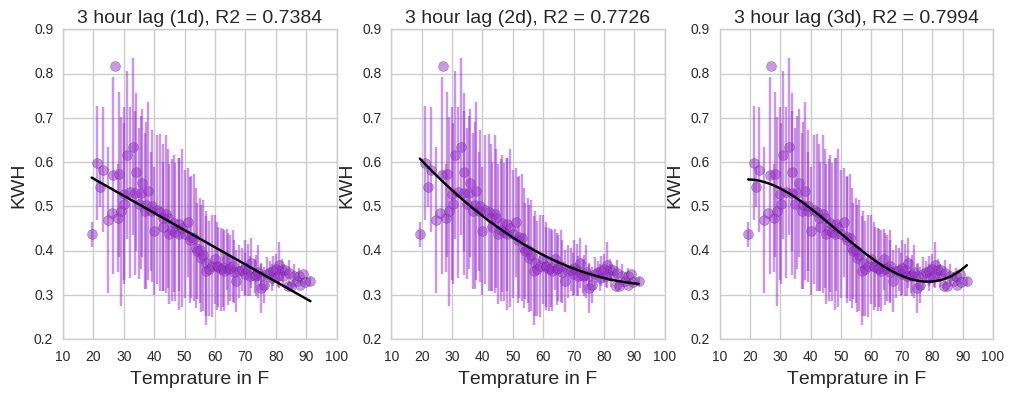

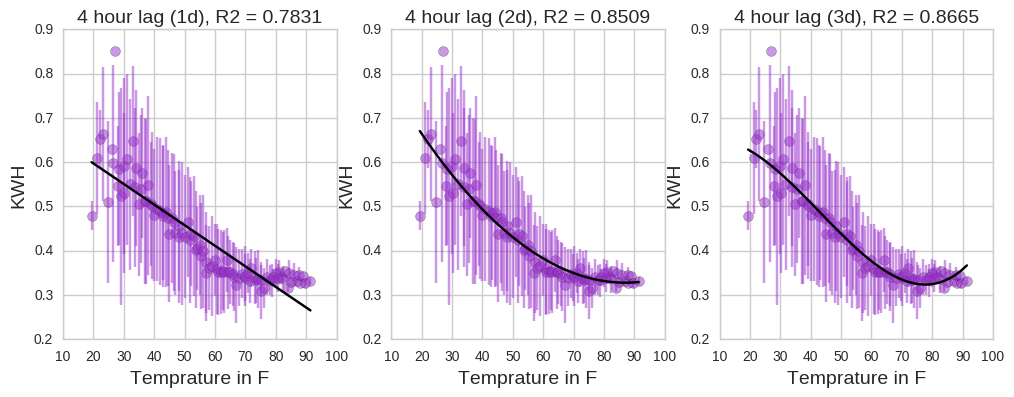

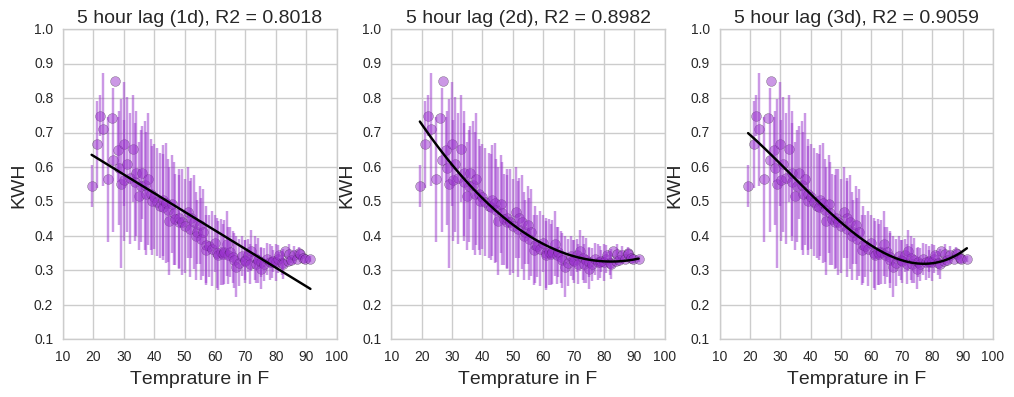

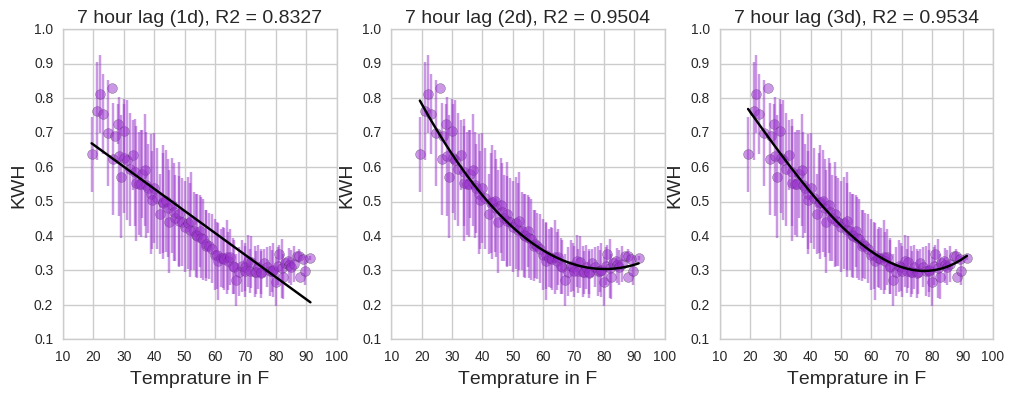

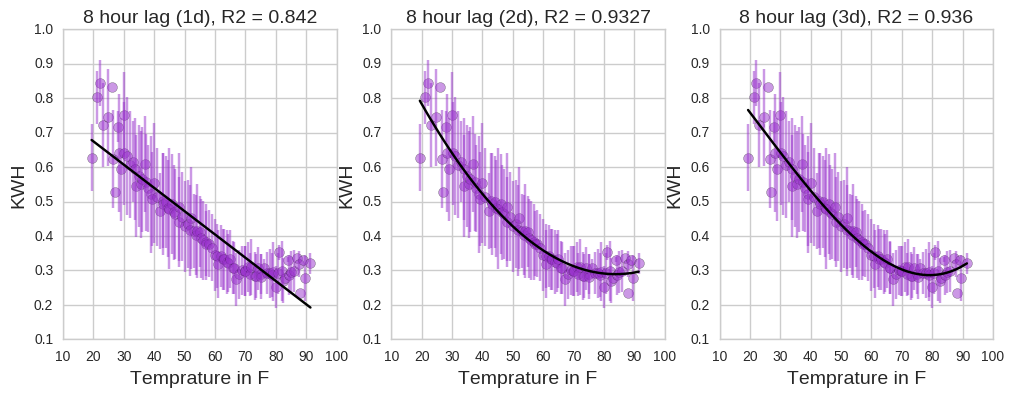

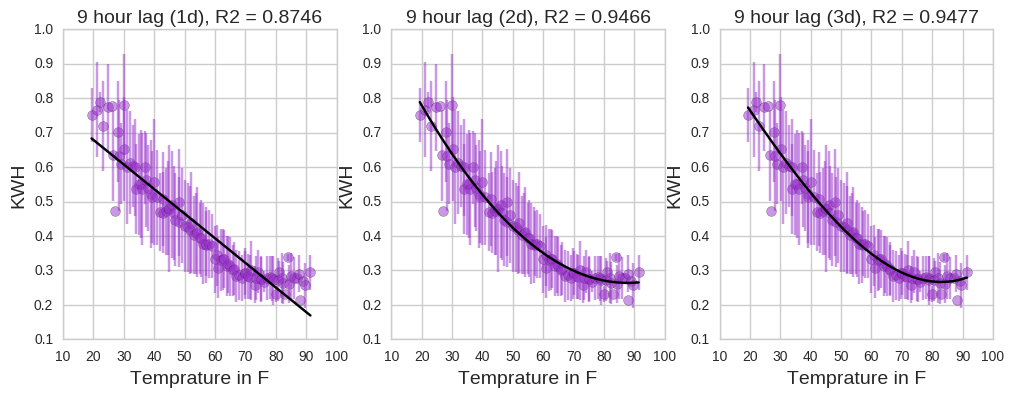

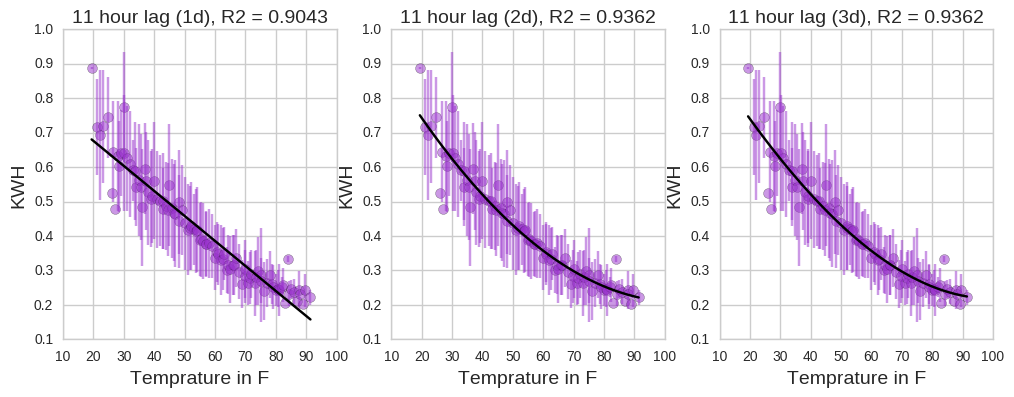

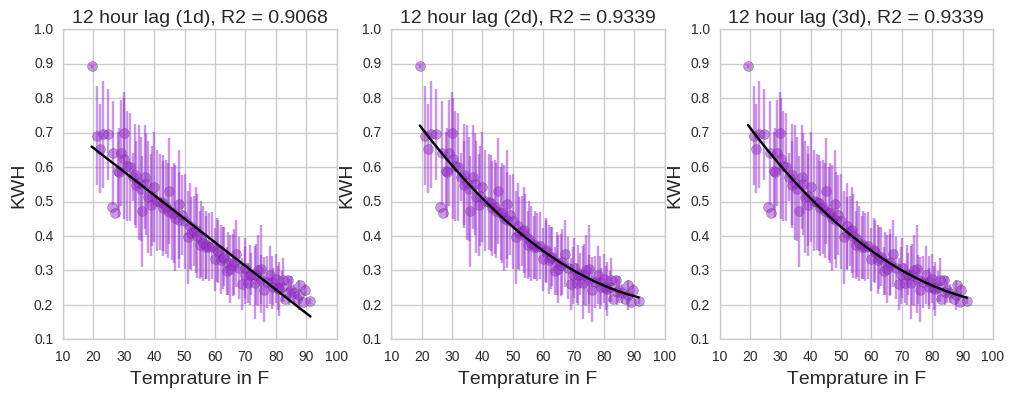

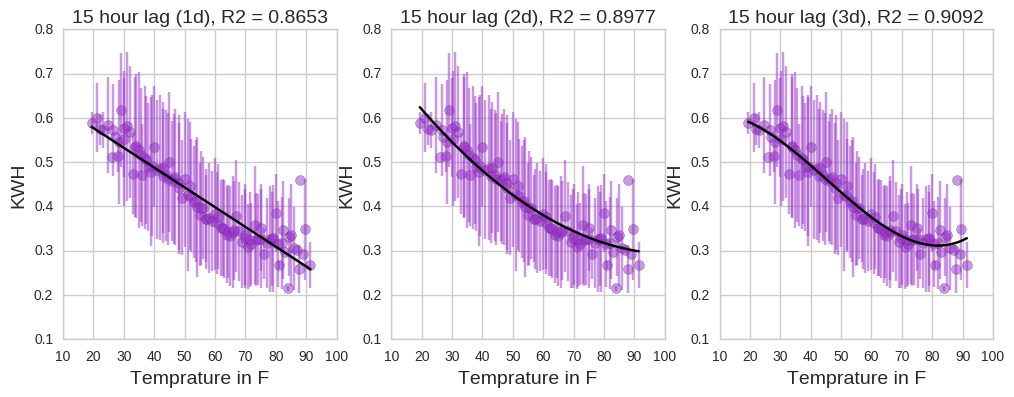

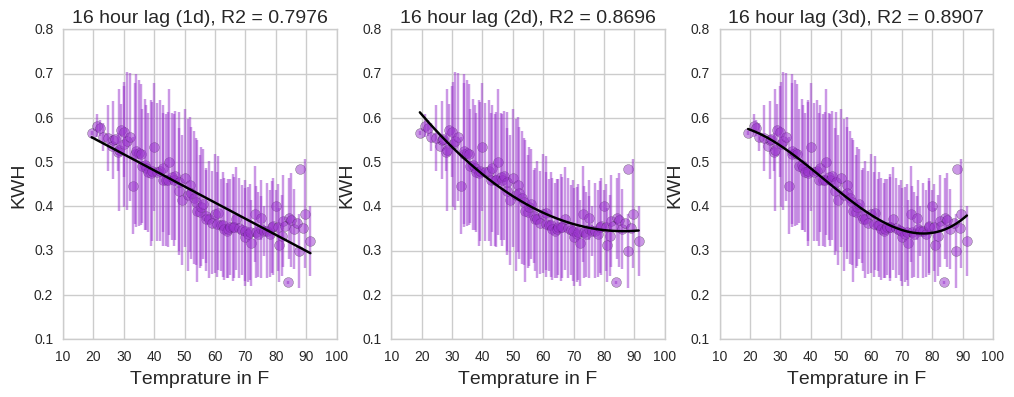

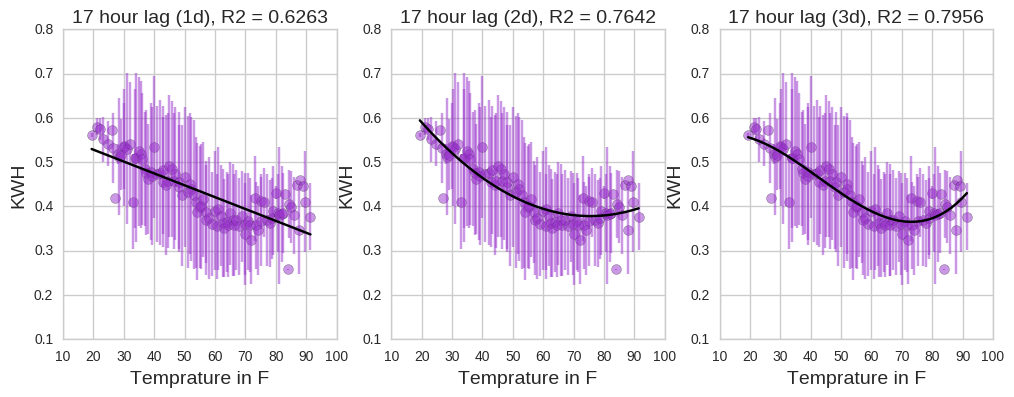

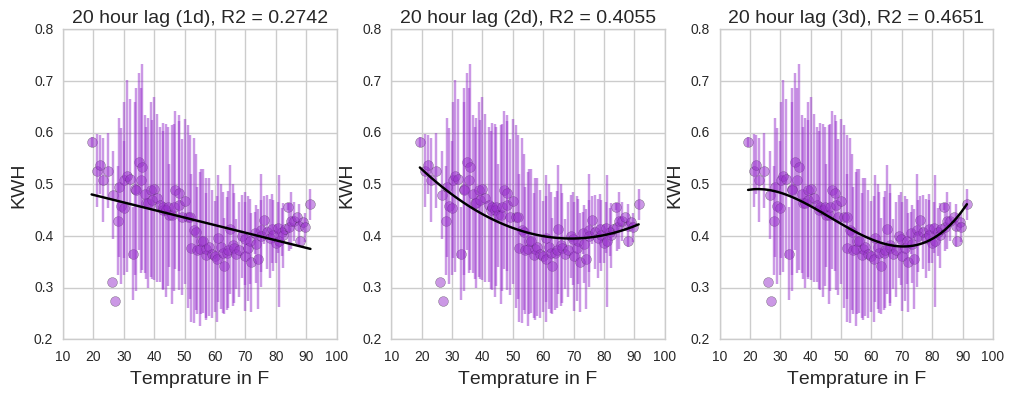

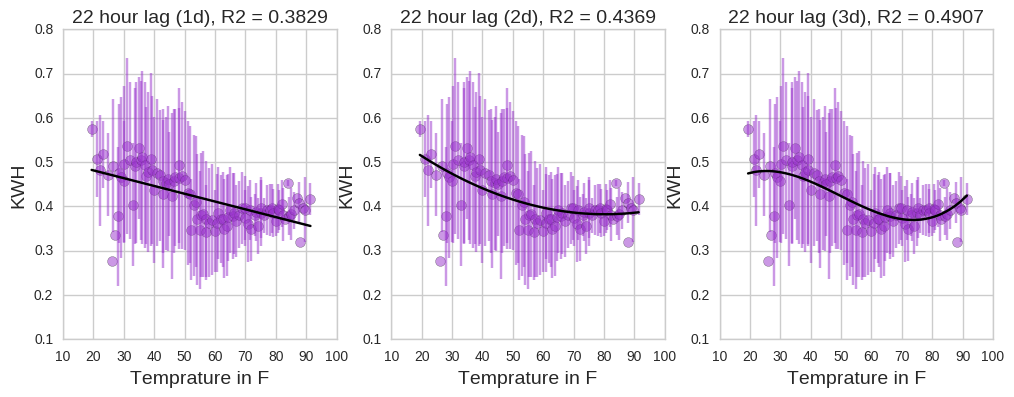

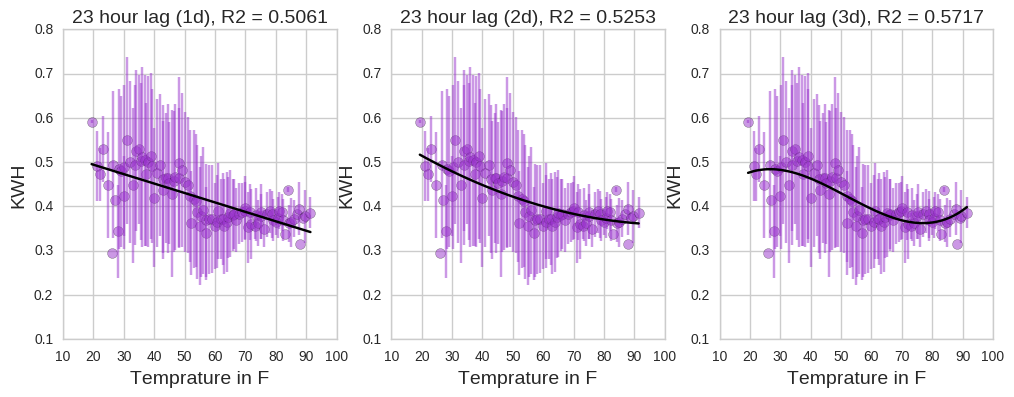

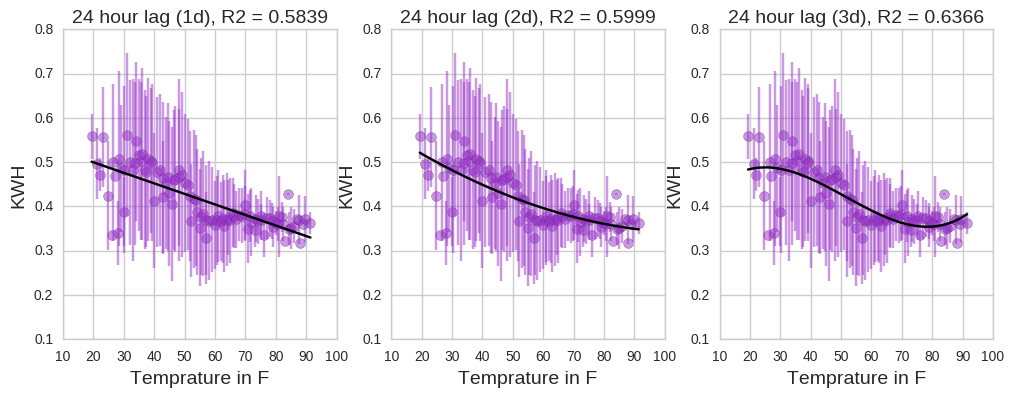

In [28]:
for i in range(1,25):
    #establishing the lag
    x = np.array(final1213.Temperature_F[i:])
    y1 = np.array(final1213.Overall[:-i])
    timelag = pd.DataFrame()
    timelag['Temp'] = x
    timelag['Overall'] = y1
    #grouping by temperature
    lag_grp1 = timelag.groupby(['Temp']).mean()
    lag_grp1.reset_index(inplace=True)
    lag_grp2 = timelag.groupby(['Temp']).std()
    lag_grp2.reset_index(inplace=True)
    lag_grp2.columns = [['Temp', 'std']]
    lag_grp = pd.merge(lag_grp1, lag_grp2, on='Temp')
    #running regression
    p1 = smf.ols(formula = 'Overall ~ Temp', data = lag_grp).fit()
    p2 = smf.ols(formula = 'Overall ~ np.power(Temp, 2) + Temp', data = lag_grp).fit()
    p3 = smf.ols(formula = 'Overall ~ np.power(Temp, 3) + np.power(Temp, 2) + Temp', data = lag_grp).fit()
    
    #ploting results
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='darkorchid', yerr='std',s=50, alpha=.5, ax=ax1)
    ax1.plot(lag_grp.Temp, p1.predict(), color='k')
    ax1.set_title('{0} hour lag (1d), R2 = {1}'.format(i, round(p1.rsquared, 4)), fontsize=14)
    ax1.set_ylabel("KWH", fontsize=14)
    ax1.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', yerr='std', color='darkorchid',s=50, alpha=.5, ax=ax2)
    ax2.plot(lag_grp.Temp, p2.predict(), color='k')
    ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(i, round(p2.rsquared, 4)), fontsize=14)
    ax2.set_ylabel("KWH", fontsize=14)
    ax2.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', yerr='std', color='darkorchid',s=50, alpha=.5, ax=ax3)
    ax3.plot(lag_grp.Temp, p3.predict(), color='k')
    ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(i, round(p3.rsquared, 4)), fontsize=14)
    ax3.set_ylabel("KWH", fontsize=14)
    ax3.set_xlabel("Temprature in F", fontsize=14)
    